In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../Data/Pharmacy/D5.csv')

In [3]:
df.head()

,date,itemname,packunits,expiry,price,looseqty
0,01/07/2022,PANADOL TAB,200,4/25/24,1.70,60
1,02/07/2022,PANADOL TAB,200,4/25/24,1.70,70
2,03/07/2022,PANADOL TAB,200,4/25/24,1.70,55
3,05/07/2022,PANADOL TAB,200,4/25/24,1.45,20
4,08/07/2022,PANADOL TAB,200,4/25/24,1.70,70


In [4]:
X = df[['date', 'itemname', 'packunits', 'expiry', 'price']]
y = df['looseqty']

In [5]:
X = pd.get_dummies(X)

In [6]:
split_index = int(0.8 * len(df))

In [7]:
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [8]:
xgboost_model = XGBRegressor(objective='reg:squarederror', random_state=42)

In [9]:
xgboost_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [10]:
y_pred = xgboost_model.predict(X_test)

In [11]:
rmse = np.sqrt(mean_squared_error(y_test, np.clip(y_pred, 0, None)))
rmsle = np.sqrt(mean_squared_log_error(y_test, np.clip(y_pred, 0, None)))

In [12]:
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle}")

Root Mean Squared Error (RMSE): 145.19829304207062
Root Mean Squared Logarithmic Error (RMSLE): 0.37083087932694353


In [13]:
y_test = np.array(y_test)

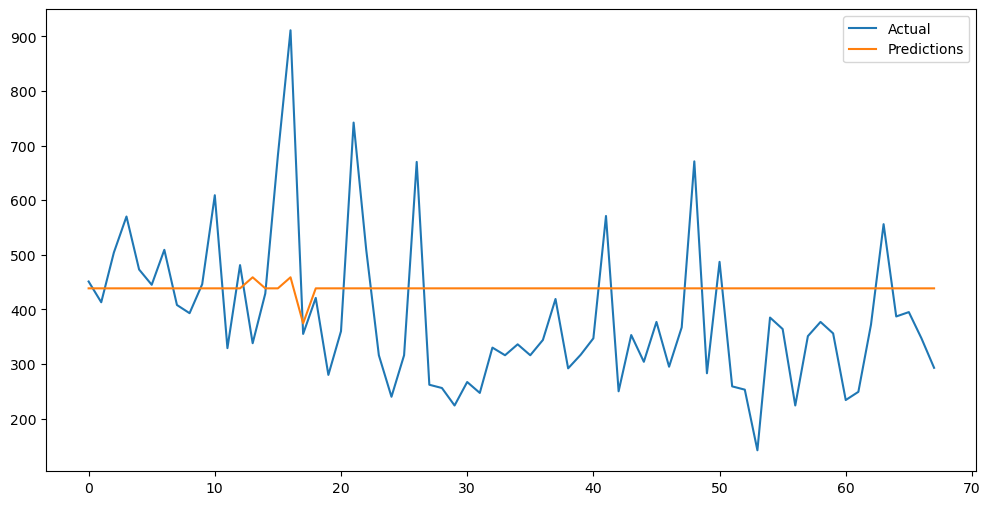

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predictions')
plt.legend()
plt.show()